In [2]:
import numpy as np

import matplotlib.pyplot as plt

import matplotlib

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

figsize = (22, 8)
fontsize_title = 24
fontsize_ax = 20
fontsize_legenda = 16
fontsize_ticks = 20

lw=3



In [19]:
main_dir = "/data/mrando/svrz_results/black_box_class"

budget = 5000000
gammas = np.logspace(-4, 1, 50)
inner_iterations = [25, 50, 100, 150]

names = ['zosvrg_ave', 'zosvrg_coord', 'szvr_g', 'zosvrg_cr', 'zospider_szo', 'zospider_coord', 'osvrz']#, 'sszd', 'gauss_fd', 'sph_fd']

name_map = {
    'osvrz' : "O-SVRZ", 
    'zosvrg_ave' : "ZO-SVRG-Ave", 
    'zosvrg_coord' : "ZO-SVRG-Coord", 
    'szvr_g' : "SZVR-G", 
    'zosvrg_cr' : "ZO-SVRG-Coord-Rand", 
    'zospider_szo' : "ZO-Spider-SZO", 
    'zospider_coord': "ZO-Spider-Coord", 
    'sszd' : "S-SZD", 
    'gauss_fd' : "Gaussian FD", 
    'sph_fd' : "Spherical FD"
}


def read_param_tuning_results(dataset_name, path, l, m):
    results = {}
    for gamma in gammas:
        with open(f"{path}/{dataset_name}_{m}_{l}_{gamma}.log") as f:
            for line in f.readlines():
                splitted = line.split(",")
                name = splitted[0]
                f0 = float(splitted[1])
                f_T = float(splitted[2]) 
                f_c = float(splitted[3])
                time_mu = float(splitted[4]) 
                time_std = float(splitted[5])

                f_T = f0 if f_T != f_T or f_T >= f0  else f_T 
                f_c = 1e-20 if f_T != f_T or f_c != f_c or  f_T >= f0  else f_c
                if name not in results:
                    results[name] = ([f_T], [f_c], [time_mu], [time_std])
                else:
                    results[name][0].append(f_T)
                    results[name][1].append(f_c)
                    results[name][2].append(time_mu)
                    results[name][3].append(time_std)
    return results


def read_full_results(method_name, path, l, m, gamma):
    results = [[],[],[],[],[]]
    with open(f"{path}/{method_name}_{m}_{l}_{gamma}.log") as f:
        for line in f.readlines():
            splitted = line.split(",")
            for i in range(len(splitted)):
                results[i].append(float(splitted[i]))
    return results

def get_min_idx(results):
    k = 0
    min_v = min(results[0][0])
    for i in range(1, len(results)):
        if min_v > min(results[i][0]):
            k = i
            min_v = min(results[i][0])
    return k

                    

In [20]:
def plot_changing_l(num_directions, results_50, results_100, results_150, title, out_name):
    fig, (ax2, ax3, ax4) = plt.subplots(1, 3, figsize=figsize)

    fig.suptitle(title, fontsize=fontsize_title)

    # for (i, values) in enumerate(results_25):
    #     mu  = np.array(values[0])
    #     std = np.array(values[1])
    #     ax1.plot(gammas, mu, 'o-', label="$\\ell = {}$".format(num_directions[i]))
    #     ax1.fill_between(gammas, mu - std, mu + std, alpha=0.3)
    #     ax1.legend()

    for (i, values) in enumerate(results_50):
        mu  = np.array(values[0])
        std = np.array(values[1])
        ax2.plot(gammas, mu, 'o-', label="$\\ell = {}$".format(num_directions[i]))
        ax2.fill_between(gammas, mu - std, mu + std, alpha=0.3)
        ax2.legend()

    for (i, values) in enumerate(results_100):
        mu  = np.array(values[0])
        std = np.array(values[1])
        ax3.plot(gammas, mu, 'o-', label="$\\ell = {}$".format(num_directions[i]))
        ax3.fill_between(gammas, mu - std, mu + std, alpha=0.3)

    for (i, values) in enumerate(results_150):
        mu  = np.array(values[0])
        std = np.array(values[1])
        ax4.plot(gammas, mu, 'o-', label="$\\ell = {}$".format(num_directions[i]))
        ax4.fill_between(gammas, mu - std, mu + std, alpha=0.3)
        
        
    #ax1.set_title("$m = 25$", fontsize=fontsize_ax)
    ax2.set_title("$m = 50$", fontsize=fontsize_ax)
    ax3.set_title("$m = 100$", fontsize=fontsize_ax)
    ax4.set_title("$m = 150$", fontsize=fontsize_ax)

    # ax1.set_ylabel("$F(x^T_0)$", fontsize=fontsize_ax)
    # ax1.set_xlabel("$\\gamma$", fontsize=fontsize_ax)
    # ax1.set_yscale("log")
    # ax1.set_xscale("log")
    ax2.legend(loc='lower left',fontsize=fontsize_legenda)

    ax2.set_ylabel("$F(x^T_0)$", fontsize=fontsize_ax)
    ax2.set_xlabel("$\\gamma$", fontsize=fontsize_ax)
    ax2.set_yscale("log")
    ax2.set_xscale("log")

    ax3.set_ylabel("$F(x^T_0)$", fontsize=fontsize_ax)
    ax3.set_xlabel("$\\gamma$", fontsize=fontsize_ax)
    ax3.set_yscale("log")
    ax3.set_xscale("log")

    ax4.set_ylabel("$F(x^T_0)$", fontsize=fontsize_ax)
    ax4.set_xlabel("$\\gamma$", fontsize=fontsize_ax)
    ax4.set_yscale("log")
    ax4.set_xscale("log")

    ax2.tick_params(labelsize=fontsize_ticks)
    ax3.tick_params(labelsize=fontsize_ticks)
    ax4.tick_params(labelsize=fontsize_ticks)

    fig.tight_layout()
    fig.savefig(f"{out_name}", bbox_inches='tight')
    


In [21]:
def plot_changing_l_vs_osvrz(num_directions, results_50, results_100, results_150, title, out_name, labels_50=None, labels_100=None, labels_150=None, legenda_all = False):
    fig, (ax2, ax3, ax4) = plt.subplots(1, 3, figsize=figsize)

    fig.suptitle(title, fontsize=fontsize_title)

    for (i, values) in enumerate(results_50):
        mu  = np.array(values[0])
        std = np.array(values[1])
        if labels_50 is None:
            ax2.plot(gammas, mu, 'o-', label="$\\ell = {}$".format(num_directions[i]))
        else:
            ax2.plot(gammas, mu, 'o-', label=labels_50[i])
        ax2.fill_between(gammas, mu - std, mu + std, alpha=0.3)
#    mu, std = osvrz_results_50
#    ax2.plot(gammas, mu, 'o-', label=label_osvrz)
#    ax2.fill_between(gammas, mu - std, mu + std, alpha=0.3)

    for (i, values) in enumerate(results_100):
        mu  = np.array(values[0])
        std = np.array(values[1])
        if labels_100 is None:
            ax3.plot(gammas, mu, 'o-', label="$\\ell = {}$".format(num_directions[i]))
        else:
            ax3.plot(gammas, mu, 'o-', label=labels_100[i])
        ax3.fill_between(gammas, mu - std, mu + std, alpha=0.3)
#    mu, std = osvrz_results_100
#    ax3.plot(gammas, mu, 'o-', label=label_osvrz)
#    ax3.fill_between(gammas, mu - std, mu + std, alpha=0.3)

    for (i, values) in enumerate(results_150):
        mu  = np.array(values[0])
        std = np.array(values[1])
        if labels_150 is None:
            ax4.plot(gammas, mu, 'o-', label="$\\ell = {}$".format(num_directions[i]))
        else:
            ax4.plot(gammas, mu, 'o-', label=labels_150[i])
        ax4.fill_between(gammas, mu - std, mu + std, alpha=0.3)
#    mu, std = osvrz_results_150
#    ax4.plot(gammas, mu, 'o-', label=label_osvrz)
#    ax4.fill_between(gammas, mu - std, mu + std, alpha=0.3)
    
#    ax2.legend()
    if legenda_all:
        ax3.legend(loc='upper left', fontsize=fontsize_legenda)        
        ax4.legend(loc='upper left', fontsize=fontsize_legenda)        
        
    #ax1.set_title("$m = 25$", fontsize=fontsize_ax)
    ax2.set_title("$m = 50$", fontsize=fontsize_ax)
    ax3.set_title("$m = 100$", fontsize=fontsize_ax)
    ax4.set_title("$m = 150$", fontsize=fontsize_ax)

    # ax1.set_ylabel("$F(x^T_0)$", fontsize=fontsize_ax)
    # ax1.set_xlabel("$\\gamma$", fontsize=fontsize_ax)
    # ax1.set_yscale("log")
    # ax1.set_xscale("log")
    ax2.legend(loc='upper left',fontsize=fontsize_legenda)

    ax2.set_ylabel("$F(x^T_0)$", fontsize=fontsize_ax)
    ax2.set_xlabel("$\\gamma$", fontsize=fontsize_ax)
    ax2.set_yscale("log")
    ax2.set_xscale("log")

    ax3.set_ylabel("$F(x^T_0)$", fontsize=fontsize_ax)
    ax3.set_xlabel("$\\gamma$", fontsize=fontsize_ax)
    ax3.set_yscale("log")
    ax3.set_xscale("log")

    ax4.set_ylabel("$F(x^T_0)$", fontsize=fontsize_ax)
    ax4.set_xlabel("$\\gamma$", fontsize=fontsize_ax)
    ax4.set_yscale("log")
    ax4.set_xscale("log")

    ax2.tick_params(labelsize=fontsize_ticks)
    ax3.tick_params(labelsize=fontsize_ticks)
    ax4.tick_params(labelsize=fontsize_ticks)

    fig.tight_layout()
    fig.savefig(f"{out_name}", bbox_inches='tight')
    plt.close(fig)
    


In [22]:
def plot_comparison(num_directions, results_50, results_100, results_150, title, out_name, labels_50=None, labels_100=None, labels_150=None, legenda_all = False):
    fig, axes = plt.subplots(1, 3, figsize=figsize)

    fig.suptitle(title, fontsize=fontsize_title)

    for (i, values) in enumerate(results_50):
        num_evals = values[4]
        mu, std, mu_time, std_time  = [], [], [], [] 
        for j in range(len(num_evals)):
            mu +=  [values[0][j] for _ in range(int(num_evals[j]))]
            std += [values[1][j] for _ in range(int(num_evals[j]))]
            mu_time +=  [values[2][j] for _ in range(int(num_evals[j]))]
            std_time += [values[3][j] for _ in range(int(num_evals[j]))]
        mu, std = np.array(mu)[:budget], np.array(std)[:budget]
        mu_time, std_time = np.array(mu_time)[:budget], np.array(std_time)[:budget]
        if labels_50 is None:
            axes[0, 0].plot(range(mu.shape[0]), mu, '-', lw=lw, label="$\\ell = {}$".format(num_directions[i]))
        else:
            axes[0, 0].plot(range(mu.shape[0]), mu, '-', lw=lw, label=labels_50[i])
            axes[1, 0].plot(range(mu_time.shape[0]), mu_time, '-', lw=lw, label=labels_50[i])
        axes[0, 0].fill_between(range(mu.shape[0]), mu - std, mu + std, alpha=0.3)
        axes[1, 0].fill_between(range(mu_time.shape[0]), mu_time - std_time, mu_time + std_time, alpha=0.3)

    for (i, values) in enumerate(results_100):
        num_evals = values[4]
        mu, std, mu_time, std_time  = [], [], [], [] 
        for j in range(len(num_evals)):
            mu +=  [values[0][j] for _ in range(int(num_evals[j]))]
            std += [values[1][j] for _ in range(int(num_evals[j]))]
            mu_time +=  [values[2][j] for _ in range(int(num_evals[j]))]
            std_time += [values[3][j] for _ in range(int(num_evals[j]))]
        mu, std = np.array(mu)[:budget], np.array(std)[:budget]
        mu_time, std_time = np.array(mu_time)[:budget], np.array(std_time)[:budget]
        if labels_100 is None:
            axes[0, 1].plot(range(mu.shape[0]), mu, '-', lw=lw, label="$\\ell = {}$".format(num_directions[i]))
        else:
            axes[0, 1].plot(range(mu.shape[0]), mu, '-', lw=lw, label=labels_100[i])
            axes[1, 1].plot(range(mu_time.shape[0]), mu_time, '-', lw=lw, label=labels_50[i])
        axes[0, 1].fill_between(range(mu.shape[0]), abs(mu - std), mu + std, alpha=0.3)
        axes[1, 1].fill_between(range(mu_time.shape[0]), mu_time - std_time, mu_time + std_time, alpha=0.3)

    for (i, values) in enumerate(results_150):
        num_evals = values[4]
        mu, std, mu_time, std_time  = [], [], [], [] 
        for j in range(len(num_evals)):
            mu +=  [values[0][j] for _ in range(int(num_evals[j]))]
            std += [values[1][j] for _ in range(int(num_evals[j]))]
            mu_time +=  [values[2][j] for _ in range(int(num_evals[j]))]
            std_time += [values[3][j] for _ in range(int(num_evals[j]))]
        mu, std = np.array(mu)[:budget], np.array(std)[:budget]
        mu_time, std_time = np.array(mu_time)[:budget], np.array(std_time)[:budget]
        if labels_150 is None:
            axes[0, 2].plot(range(mu.shape[0]), mu, '-', lw=lw, label="$\\ell = {}$".format(num_directions[i]))
        else:
            axes[0, 2].plot(range(mu.shape[0]), mu, '-', lw=lw, label=labels_150[i])
            axes[1, 2].plot(range(mu_time.shape[0]), mu_time, '-', lw=lw, label=labels_50[i])
        axes[0, 2].fill_between(range(mu.shape[0]), mu - std, mu + std, alpha=0.3)
        axes[1, 2].fill_between(range(mu_time.shape[0]), mu_time - std_time, mu_time + std_time, alpha=0.3)
    
#    if legenda_all:
#        axes[0, 1].legend(loc='upper left', fontsize=fontsize_legenda)        
#        axes[0, 2].legend(loc='upper left', fontsize=fontsize_legenda)        
        
    axes[0, 0].set_title("$m = 50$", fontsize=fontsize_ax)
    axes[0, 1].set_title("$m = 100$", fontsize=fontsize_ax)
    axes[0, 2].set_title("$m = 150$", fontsize=fontsize_ax)

    axes[0, 0].legend(loc='upper left',fontsize=fontsize_legenda)

    axes[0, 0].set_ylabel("$F(x^\\tau_0)$", fontsize=fontsize_ax)
    axes[0, 0].set_xlabel("$\\#$ stochastic function evaluation", fontsize=fontsize_ax)
    axes[0, 0].set_yscale("log")

    axes[0, 1].set_ylabel("$F(x^\\tau_0)$", fontsize=fontsize_ax)
    axes[0, 1].set_xlabel("$\\#$ stochastic function evaluation", fontsize=fontsize_ax)
    axes[0, 1].set_yscale("log")

    axes[0, 2].set_ylabel("$F(x^\\tau_0)$", fontsize=fontsize_ax)
    axes[0, 2].set_xlabel("$\\#$ stochastic function evaluation", fontsize=fontsize_ax)
    axes[0, 2].set_yscale("log")

    axes[1, 0].set_ylabel("time $(s)$", fontsize=fontsize_ax)
    axes[1, 0].set_xlabel("$\\#$ stochastic function evaluation", fontsize=fontsize_ax)
    axes[1, 0].set_yscale("log")

    axes[1, 1].set_ylabel("time $(s)$", fontsize=fontsize_ax)
    axes[1, 1].set_xlabel("$\\#$ stochastic function evaluation", fontsize=fontsize_ax)
    axes[1, 1].set_yscale("log")

    axes[1, 2].set_ylabel("time $(s)$", fontsize=fontsize_ax)
    axes[1, 2].set_xlabel("$\\#$ stochastic function evaluation", fontsize=fontsize_ax)
    axes[1, 2].set_yscale("log")


    axes[0, 0].tick_params(labelsize=fontsize_ticks)
    axes[0, 1].tick_params(labelsize=fontsize_ticks)
    axes[0, 2].tick_params(labelsize=fontsize_ticks)
    
    axes[1, 0].tick_params(labelsize=fontsize_ticks)
    axes[1, 1].tick_params(labelsize=fontsize_ticks)
    axes[1, 2].tick_params(labelsize=fontsize_ticks)

    fig.tight_layout()
    fig.savefig(f"{out_name}", bbox_inches='tight')
    plt.close(fig)

# IJCNN1

In [23]:
result_dir = f"{main_dir}/ijcnn1/param_tuning"
dataset_name = 'ijcnn1'
d = 22
num_directions = [d // i for i in [10, 5, 4, 3, 2, 1]] 



## OSVRZ: Changing l

In [130]:
#results_25  = [read_param_tuning_results(dataset_name, result_dir, l, m=25)['osvrz'] for l in num_directions]
results_50  = [read_param_tuning_results(dataset_name, result_dir, l, m=50)['osvrz'] for l in num_directions]
results_100 = [read_param_tuning_results(dataset_name, result_dir, l, m=100)['osvrz'] for l in num_directions]
results_150 = [read_param_tuning_results(dataset_name, result_dir, l, m=150)['osvrz'] for l in num_directions]



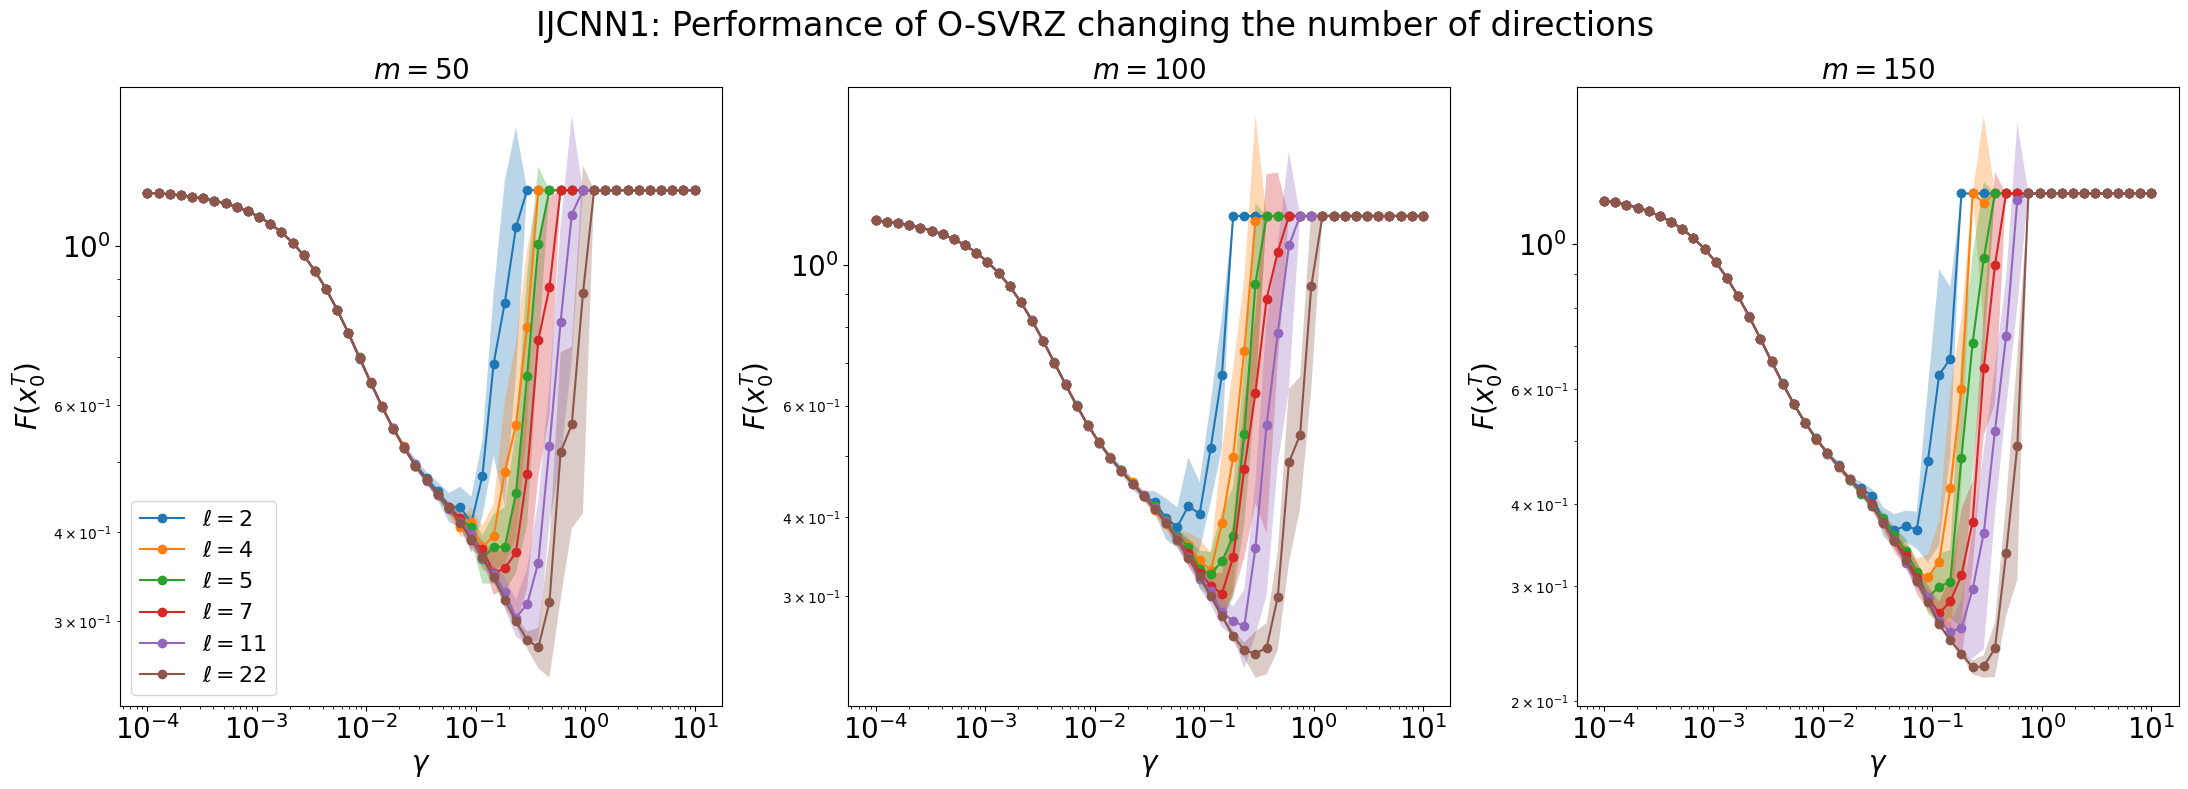

In [131]:
plot_changing_l(num_directions, results_50, results_100, results_150, "IJCNN1: Performance of O-SVRZ changing the number of directions", "./osvrg_changing_l_ijcnn1.pdf")



## Comparison with other methods

In [83]:
idx = 5
osvrz_results_50 =  (np.array(results_50[idx][0]), np.array(results_50[idx][1]))
osvrz_results_100 = (np.array(results_100[idx][0]), np.array(results_100[idx][1]))
osvrz_results_150 = (np.array(results_150[idx][0]), np.array(results_150[idx][1]))

label_osvrz = f"O-SVRZ [$\ell = {num_directions[idx]}$]"

for name in names[1:]:
    results_mth_50  = [read_param_tuning_results(dataset_name, result_dir, l, m=50)[name] for l in num_directions]
    results_mth_100 = [read_param_tuning_results(dataset_name, result_dir, l, m=100)[name] for l in num_directions]
    results_mth_150 = [read_param_tuning_results(dataset_name, result_dir, l, m=150)[name] for l in num_directions]
    title = f"IJCNN1: Performance of {name_map[name]} against O-SVRZ changing the number of directions"
    out_name = f"./osvrz_vs_{name}_changing_l_ijcnn1.pdf"
    plot_changing_l_vs_osvrz(num_directions, label_osvrz, results_mth_50, results_mth_100, results_mth_150, title, out_name)


## Comparison with best

In [24]:

mth_results_50, mth_results_100, mth_results_150 = [],[],[]
result_labels_50, result_labels_100, result_labels_150 = [], [], []
best_ind_50, best_ind_100, best_ind_150 = [], [], []
best_ind_gamma_50, best_ind_gamma_100, best_ind_gamma_150 = [], [], []

for name in names:#[1:]:
    results_mth_50  = [ read_param_tuning_results(dataset_name, result_dir, l, m=50)[name] for l in num_directions]
    results_mth_100 = [read_param_tuning_results(dataset_name, result_dir, l, m=100)[name] for l in num_directions]
    results_mth_150 = [read_param_tuning_results(dataset_name, result_dir, l, m=150)[name] for l in num_directions]
    min_idx_50, min_idx_100, min_idx_150 =get_min_idx(results_mth_50), get_min_idx(results_mth_100), get_min_idx(results_mth_150) 
    best_ind_50.append(min_idx_50)
    best_ind_100.append(min_idx_100)
    best_ind_150.append(min_idx_150)
    best_ind_gamma_50.append(gammas[np.argmin(results_mth_50[min_idx_50][0])])
    best_ind_gamma_100.append(gammas[np.argmin(results_mth_100[min_idx_100][0])])
    best_ind_gamma_150.append(gammas[np.argmin(results_mth_150[min_idx_150][0])])
    mth_results_50.append(results_mth_50[min_idx_50])#  = [ read_param_tuning_results(dataset_name, result_dir, l, m=50)[name][0] for l in num_directions]
    mth_results_100.append(results_mth_100[min_idx_100])# = [read_param_tuning_results(dataset_name, result_dir, l, m=100)[name][0] for l in num_directions]
    mth_results_150.append(results_mth_150[min_idx_150])# = [read_param_tuning_results(dataset_name, result_dir, l, m=150)[name][0] for l in num_directions]
    result_labels_50 .append("{}".format(name_map[name]))
    result_labels_100.append("{}".format(name_map[name]))
    result_labels_150.append("{}".format(name_map[name]))
    
title = f"IJCNN1: Comparison of Zeroth-order Variance Reduced method"
out_name = f"./osvrz_vs_other_changing_l_ijcnn1.pdf"
plot_changing_l_vs_osvrz(num_directions, mth_results_50, mth_results_100, mth_results_150, title, out_name, labels_50=result_labels_50, labels_100=result_labels_100, labels_150=result_labels_150, legenda_all=False)


In [25]:
full_ris_50, full_ris_100, full_ris_150 = [], [], []
path = f"{main_dir}/ijcnn1/full_results"

for (i, name) in enumerate(names):    
    full_ris_50.append(read_full_results(name, path, num_directions[best_ind_50[i]],    m=50, gamma=best_ind_gamma_50[i]))
    full_ris_100.append(read_full_results(name, path, num_directions[best_ind_100[i]], m=100, gamma=best_ind_gamma_100[i]))
    full_ris_150.append(read_full_results(name, path, num_directions[best_ind_150[i]], m=150, gamma=best_ind_gamma_150[i]))

    

In [26]:
title = "IJCNN1: Comparison with Zeroth-order Variance Reduced Methods"
out_name = "./ijcnn1_method_comparison.pdf"
plot_comparison(num_directions, full_ris_50, full_ris_100, full_ris_150, title, out_name, result_labels_50, result_labels_100, result_labels_150, legenda_all=False)

## PHISHING

In [15]:
result_dir = f"{main_dir}/phishing/param_tuning"
dataset_name = 'phishing'
d = 68
num_directions = [d // i for i in [10, 5, 4, 3, 2, 1]] 



In [77]:
#results_25  = [read_param_tuning_results(dataset_name, result_dir, l, m=25)['osvrz'] for l in num_directions]
results_50  = [read_param_tuning_results(dataset_name, result_dir, l, m=50)['osvrz'] for l in num_directions]
results_100 = [read_param_tuning_results(dataset_name, result_dir, l, m=100)['osvrz'] for l in num_directions]
results_150 = [read_param_tuning_results(dataset_name, result_dir, l, m=150)['osvrz'] for l in num_directions]



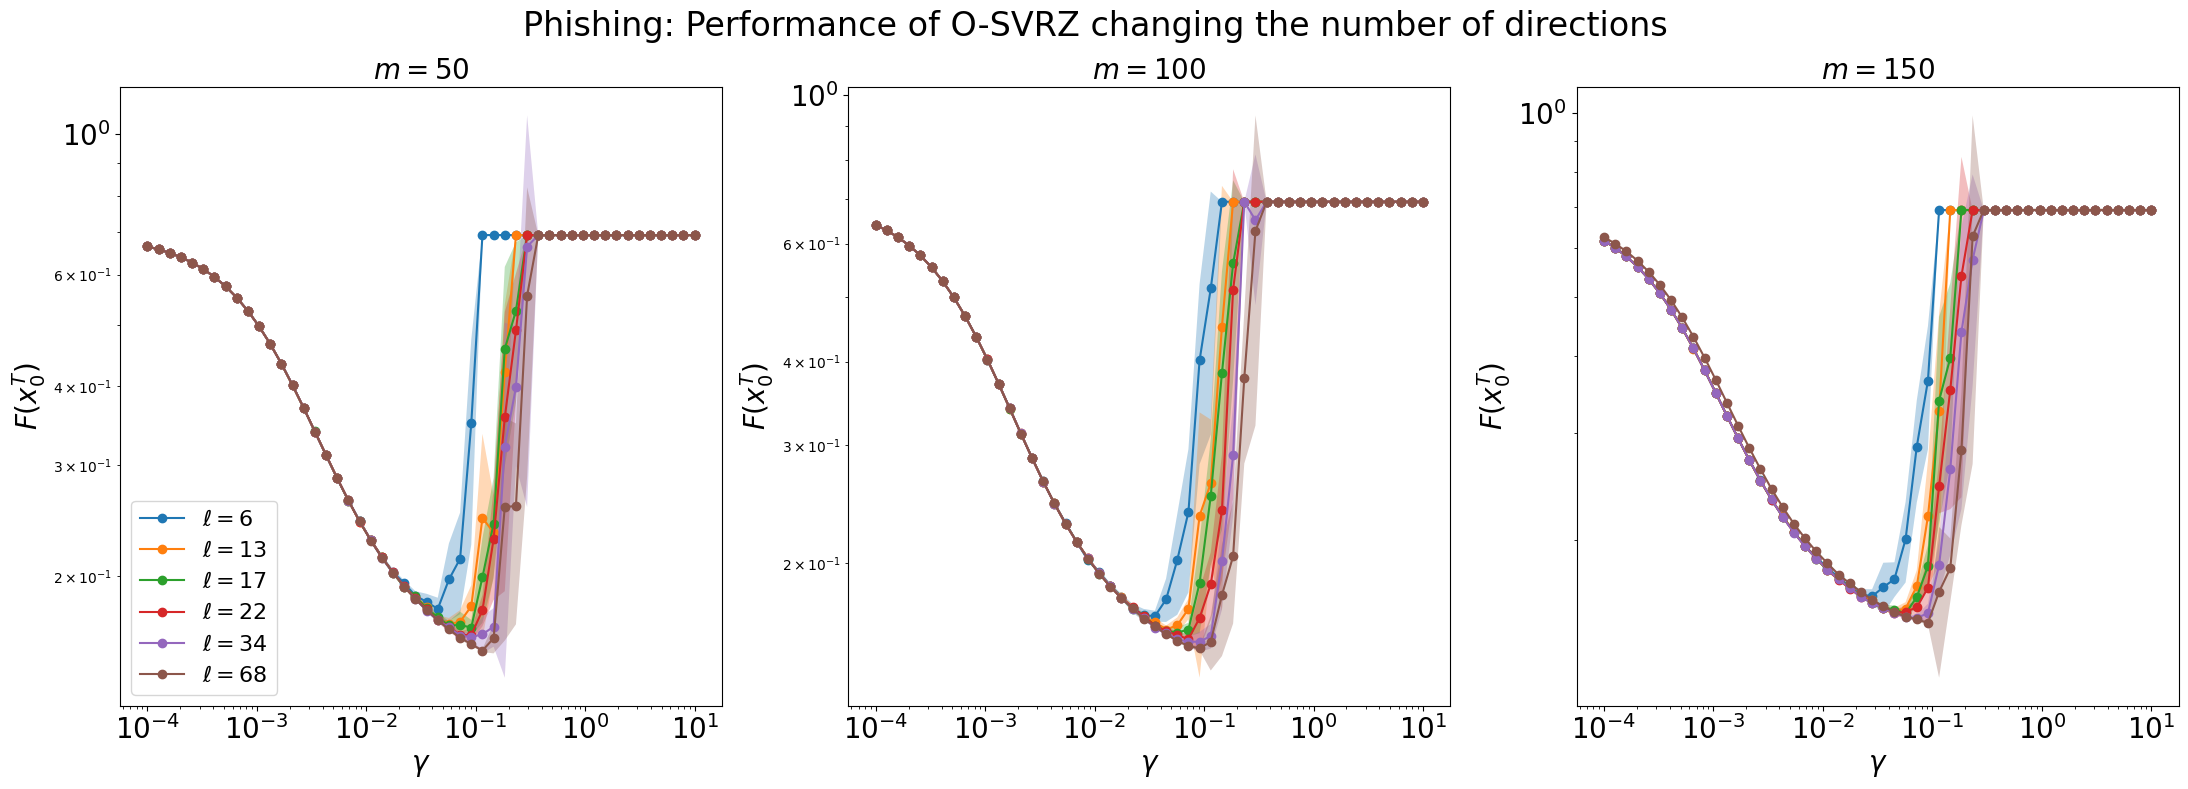

In [78]:
plot_changing_l(num_directions, results_50, results_100, results_150, "Phishing: Performance of O-SVRZ changing the number of directions", "./osvrg_changing_l_phishing.pdf")

## Changing L

In [79]:
idx = 5
osvrz_results_50 =  (np.array(results_50[idx][0]), np.array(results_50[idx][1]))
osvrz_results_100 = (np.array(results_100[idx][0]), np.array(results_100[idx][1]))
osvrz_results_150 = (np.array(results_150[idx][0]), np.array(results_150[idx][1]))

label_osvrz = f"O-SVRZ [$\ell = {num_directions[idx]}$]"

for name in names[1:]:
    results_mth_50  = [read_param_tuning_results(dataset_name, result_dir, l, m=50)[name] for l in num_directions]
    results_mth_100 = [read_param_tuning_results(dataset_name, result_dir, l, m=100)[name] for l in num_directions]
    results_mth_150 = [read_param_tuning_results(dataset_name, result_dir, l, m=150)[name] for l in num_directions]
    title = f"Phishing: Performance of {name_map[name]} against O-SVRZ changing the number of directions"
    out_name = f"./osvrz_vs_{name}_changing_l_phishing.pdf"
    plot_changing_l_vs_osvrz(num_directions, osvrz_results_50, osvrz_results_100, osvrz_results_150, label_osvrz, results_mth_50, results_mth_100, results_mth_150, title, out_name)


## Comparison against best

In [16]:

mth_results_50, mth_results_100, mth_results_150 = [],[],[]
result_labels_50, result_labels_100, result_labels_150 = [], [], []
best_ind_50, best_ind_100, best_ind_150 = [], [], []
best_ind_gamma_50, best_ind_gamma_100, best_ind_gamma_150 = [], [], []

for name in names:#[1:]:
    results_mth_50  = [ read_param_tuning_results(dataset_name, result_dir, l, m=50)[name] for l in num_directions]
    results_mth_100 = [read_param_tuning_results(dataset_name, result_dir, l, m=100)[name] for l in num_directions]
    results_mth_150 = [read_param_tuning_results(dataset_name, result_dir, l, m=150)[name] for l in num_directions]
    min_idx_50, min_idx_100, min_idx_150 =get_min_idx(results_mth_50), get_min_idx(results_mth_100), get_min_idx(results_mth_150) 
    best_ind_50.append(min_idx_50)
    best_ind_100.append(min_idx_100)
    best_ind_150.append(min_idx_150)
    best_ind_gamma_50.append(gammas[np.argmin(results_mth_50[min_idx_50][0])])
    best_ind_gamma_100.append(gammas[np.argmin(results_mth_100[min_idx_100][0])])
    best_ind_gamma_150.append(gammas[np.argmin(results_mth_150[min_idx_150][0])])
    mth_results_50.append(results_mth_50[min_idx_50])#  = [ read_param_tuning_results(dataset_name, result_dir, l, m=50)[name][0] for l in num_directions]
    mth_results_100.append(results_mth_100[min_idx_100])# = [read_param_tuning_results(dataset_name, result_dir, l, m=100)[name][0] for l in num_directions]
    mth_results_150.append(results_mth_150[min_idx_150])# = [read_param_tuning_results(dataset_name, result_dir, l, m=150)[name][0] for l in num_directions]
    result_labels_50 .append("{}".format(name_map[name]))
    result_labels_100.append("{}".format(name_map[name]))
    result_labels_150.append("{}".format(name_map[name]))
        
title = f"Phishing: Comparison of Zeroth-order Variance Reduced method"
out_name = f"./osvrz_vs_other_changing_l_phishing.pdf"
plot_changing_l_vs_osvrz(num_directions,  mth_results_50, mth_results_100, mth_results_150, title, out_name, labels_50=result_labels_50, labels_100=result_labels_100, labels_150=result_labels_150, legenda_all=False)


In [17]:
full_ris_50, full_ris_100, full_ris_150 = [], [], []
path = f"{main_dir}/phishing/full_results"

for (i, name) in enumerate(names):    
    full_ris_50.append(read_full_results(name, path, num_directions[best_ind_50[i]],    m=50, gamma=best_ind_gamma_50[i]))
    full_ris_100.append(read_full_results(name, path, num_directions[best_ind_100[i]], m=100, gamma=best_ind_gamma_100[i]))
    full_ris_150.append(read_full_results(name, path, num_directions[best_ind_150[i]], m=150, gamma=best_ind_gamma_150[i]))

    

In [18]:
title = "Phishing: Comparison with Zeroth-order Variance Reduced Methods"
out_name = "./phishing_method_comparison.png"
plot_comparison(num_directions, full_ris_50, full_ris_100, full_ris_150, title, out_name, result_labels_50, result_labels_100, result_labels_150, legenda_all=False)

# PLOTS: W1A

In [55]:
result_dir = f"{main_dir}/w1a/param_tuning"
dataset_name = 'w1a'
d = 300
num_directions = [d // i for i in [10, 5, 4, 3, 2, 1]] 



In [56]:
#results_25  = [read_param_tuning_results(dataset_name, result_dir, l, m=25)['osvrz'] for l in num_directions]
results_50  = [read_param_tuning_results(dataset_name, result_dir, l, m=50)['osvrz'] for l in num_directions]
results_100 = [read_param_tuning_results(dataset_name, result_dir, l, m=100)['osvrz'] for l in num_directions]
results_150 = [read_param_tuning_results(dataset_name, result_dir, l, m=150)['osvrz'] for l in num_directions]



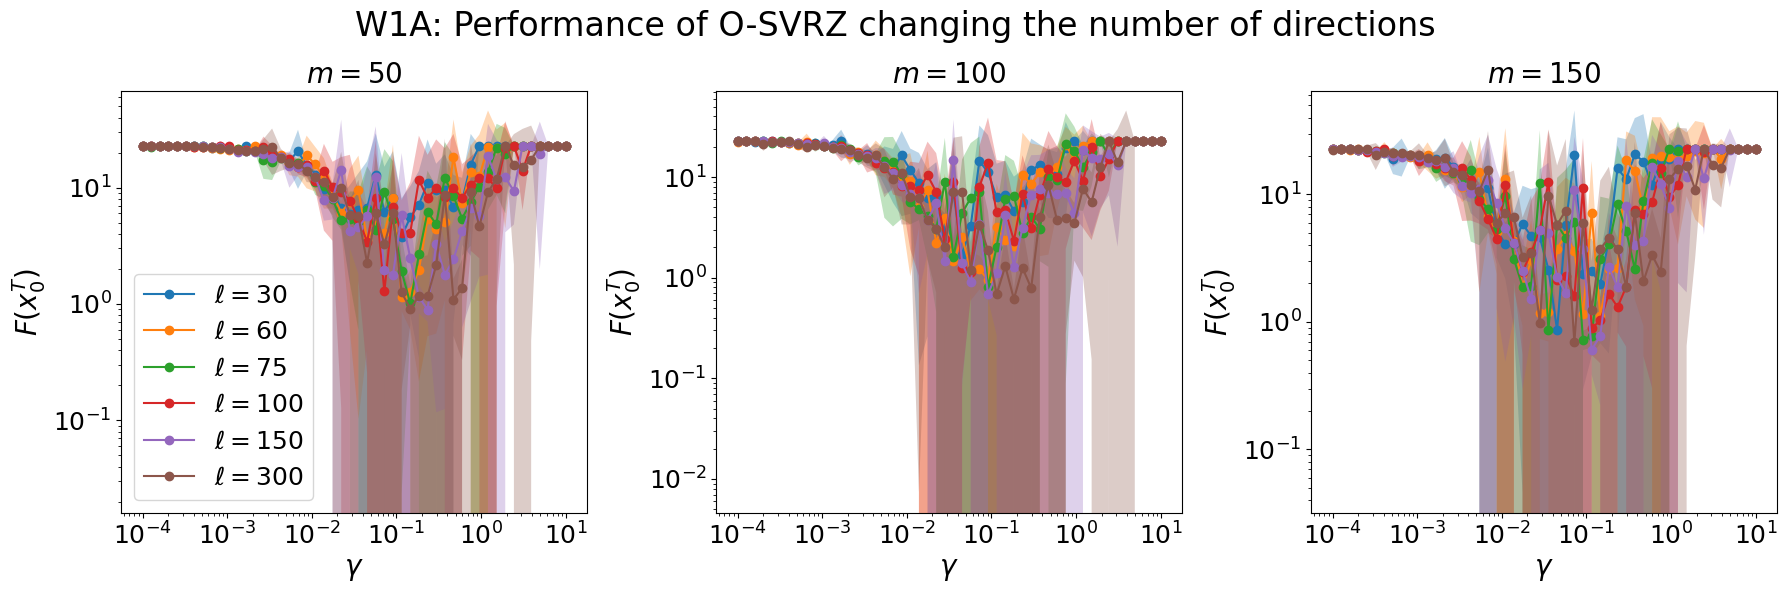

In [13]:
plot_changing_l(num_directions, results_50, results_100, results_150, "W1A: Performance of O-SVRZ changing the number of directions", "./osvrg_changing_l_w1a.pdf")

## Changing L against best

In [57]:
def get_min_idx(results):
    k = 0
    min_v = min(results[0][0])
    for i in range(1, len(results)):
        if min_v > min(results[i][0]):
            k = i
            min_v = min(results[i][0])
    return k
idx = 5
osvrz_results_50 =  (np.array(results_50[idx][0]), np.array(results_50[idx][1]))
osvrz_results_100 = (np.array(results_100[idx][0]), np.array(results_100[idx][1]))
osvrz_results_150 = (np.array(results_150[idx][0]), np.array(results_150[idx][1]))

label_osvrz = f"O-SVRZ [$\ell = {num_directions[idx]}$]"
mth_results_50, mth_results_100, mth_results_150 = [],[],[]
result_labels_50, result_labels_100, result_labels_150 = [], [], []
ndirs = num_directions
for name in names[1:]:
    if name in ['zospider_coord', 'zosvrg_coord']:
        ndirs = [d]
    results_mth_50  = [ read_param_tuning_results(dataset_name, result_dir, l, m=50)[name] for l in ndirs]
    results_mth_100 = [read_param_tuning_results(dataset_name, result_dir, l, m=100)[name] for l in ndirs]
    results_mth_150 = [read_param_tuning_results(dataset_name, result_dir, l, m=150)[name] for l in ndirs]
    min_idx_50, min_idx_100, min_idx_150 =get_min_idx(results_mth_50), get_min_idx(results_mth_100), get_min_idx(results_mth_150) 
    mth_results_50.append(results_mth_50[min_idx_50])#  = [ read_param_tuning_results(dataset_name, result_dir, l, m=50)[name][0] for l in num_directions]
    mth_results_100.append(results_mth_100[min_idx_100])# = [read_param_tuning_results(dataset_name, result_dir, l, m=100)[name][0] for l in num_directions]
    mth_results_150.append(results_mth_150[min_idx_150])# = [read_param_tuning_results(dataset_name, result_dir, l, m=150)[name][0] for l in num_directions]
    result_labels_50 .append("{} [$\\ell = {}$]".format(name_map[name], num_directions[min_idx_50]))
    result_labels_100.append("{} [$\\ell = {}$]".format(name_map[name], num_directions[min_idx_100]))
    result_labels_150.append("{} [$\\ell = {}$]".format(name_map[name], num_directions[min_idx_150]))
    
title = f"W1A: Comparison of Zeroth-order Variance Reduced method"
out_name = f"./osvrz_vs_other_changing_l_w1a.pdf"
plot_changing_l_vs_osvrz(num_directions, osvrz_results_50, osvrz_results_100, osvrz_results_150, label_osvrz, mth_results_50, mth_results_100, mth_results_150, title, out_name, labels_50=result_labels_50, labels_100=result_labels_100, labels_150=result_labels_150, legenda_all=True)


In [10]:

for name in names[1:]:
    results_25  = [read_param_tuning_results(dataset_name, result_dir, l, m=25)[name] for l in num_directions]
    results_50  = [read_param_tuning_results(dataset_name, result_dir, l, m=50)[name] for l in num_directions]
    results_100 = [read_param_tuning_results(dataset_name, result_dir, l, m=100)[name] for l in num_directions]

    mu  = np.array(osvrz_results_25[0])
    std = np.array(osvrz_results_25[1])


    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(14, 6))
    fig.suptitle(f"IJCNN1: Comparison with {name_map[name]}")
    ax1.plot(gammas, mu, 'o-', label="osvrz [$\ell = 5$]")
    ax1.fill_between(gammas, mu - std, mu + std, alpha=0.3)

    for (i, values) in enumerate(results_25):
        mu  = np.array(values[0])
        std = np.array(values[1])
        ax1.plot(gammas, mu, 'o-', label="$\\ell = {}$".format(num_directions[i]))
        ax1.fill_between(gammas, mu - std, mu + std, alpha=0.3)
        ax1.legend()

    mu  = np.array(osvrz_results_50[0])
    std = np.array(osvrz_results_50[1])
    ax2.plot(gammas, mu, 'o-', label="osvrz [$\ell = 22$]")
    ax2.fill_between(gammas, mu - std, mu + std, alpha=0.3)
    for (i, values) in enumerate(results_50):
        mu  = np.array(values[0])
        std = np.array(values[1])
        ax2.plot(gammas, mu, 'o-', label="$\\ell = {}$".format(num_directions[i]))
        ax2.fill_between(gammas, mu - std, mu + std, alpha=0.3)

    mu  = np.array(osvrz_results_100[0])
    std = np.array(osvrz_results_100[1])
    ax3.plot(gammas, mu, 'o-', label="osvrz [$\ell = 22$]")
    ax3.fill_between(gammas, mu - std, mu + std, alpha=0.3)
    for (i, values) in enumerate(results_100):
        mu  = np.array(values[0])
        std = np.array(values[1])
        ax3.plot(gammas, mu, 'o-', label="$\\ell = {}$".format(num_directions[i]))
        ax3.fill_between(gammas, mu - std, mu + std, alpha=0.3)
        
        
    ax1.set_title("$m = 25$")
    ax2.set_title("$m = 50$")
    ax3.set_title("$m = 100$")

    ax1.set_ylabel("$F(x^T_0)$")
    ax1.set_xlabel("$\\gamma$")
    ax1.set_yscale("log")
    ax1.set_xscale("log")
    ax1.legend(loc='lower left')



    ax2.set_ylabel("$F(x^T_0)$")
    ax2.set_xlabel("$\\gamma$")
    ax2.set_yscale("log")
    ax2.set_xscale("log")


    ax3.set_ylabel("$F(x^T_0)$")
    ax3.set_xlabel("$\\gamma$")
    ax3.set_yscale("log")
    ax3.set_xscale("log")



    fig.tight_layout()
    fig.savefig(f"./osvrg_vs_{name}_ijcnn1.png", bbox_inches='tight')
    plt.close(fig)


In [21]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

ax1.set_title("Function values")
ax2.set_title("Cumulative Computational Cost")

for (label, path) in methods:
    ris = read_result(budget, path)
    mu_values, std_values = ris['values']
    mu_times,  std_times  = ris['times']
    
    ax1.plot(range(len(mu_values)), mu_values, '-', label=label)
    ax1.fill_between(range(len(mu_values)), mu_values - std_values, mu_values + std_values, alpha=0.6)
    ax2.plot(range(len(mu_times)), mu_times, '-', label=label)
    ax2.fill_between(range(len(mu_times)), mu_times - std_times, mu_times + std_times, alpha=0.6)
    ris = None

ax1.set_yscale('log')
ax2.set_yscale('log')
ax1.legend(loc='upper right')

ax1.set_xlabel("# stochastic function values", fontsize=12)
ax1.set_ylabel("$F(x^\\tau) - F(x^*)$", fontsize=12)

ax2.set_xlabel("# stochastic function values", fontsize=12)
ax2.set_ylabel("Cost (s)", fontsize=12)

fig.tight_layout()
fig.savefig("test.png", bbox_inches='tight')


In [6]:
d = 50
gammas = [1e-5, 1e-3, 1e-2, 1e-2, 1.0]#[0.0001, 0.0005, 0.001, 0.005]#, 0.01, 0.05, 0.1, 0.5]
inner_iters = [5, 25, 50]
num_directions = [1] + [i for i in range(5, d + 5, 5)]
gammas = np.logspace(-4, -1, 30)

out_dir = "./results/changing_gamma/"

opt_names = ['osvrz']


In [34]:
num_directions = [1] + [i for i in range(10, d + 10, 10)]


results_25 = [read_results(out_dir, l, 25) for l in num_directions]
results_50 = [read_results(out_dir, l, 50) for l in num_directions]
results_75 = [read_results(out_dir, l, 75) for l in num_directions]

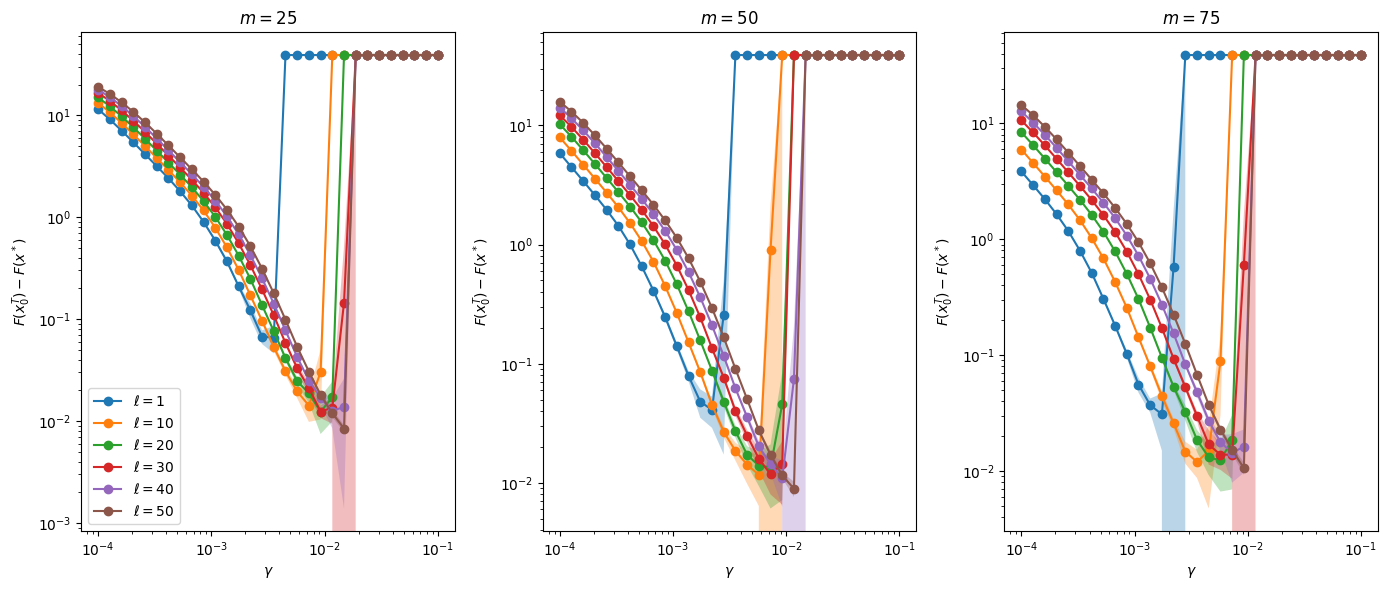

In [35]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(14, 6))
for (i, result) in enumerate(results_25):
    values = result['osvrz']
    mu  = np.array(values[0])
    std = np.array(values[1])
    ax1.plot(gammas, mu, 'o-', label="$\\ell = {}$".format(num_directions[i]))
    ax1.fill_between(gammas, mu - std, mu + std, alpha=0.3)

for result in results_50:
    values = result['osvrz']
    mu  = np.array(values[0])
    std = np.array(values[1])
    ax2.plot(gammas, mu,'o-', label="$\\ell = {}$".format(num_directions[i]))
    ax2.fill_between(gammas, mu - std, mu + std, alpha=0.3)

for result in results_75:
    values = result['osvrz']
    mu  = np.array(values[0])
    std = np.array(values[1])
    ax3.plot(gammas, mu,'o-', label="$\\ell = {}$".format(num_directions[i]))
    ax3.fill_between(gammas, mu - std, mu + std, alpha=0.3)


ax1.set_title("$m = 25$")
ax2.set_title("$m = 50$")
ax3.set_title("$m = 75$")

ax1.set_ylabel("$F(x^T_0) - F(x^*)$")
ax1.set_xlabel("$\\gamma$")
ax1.set_yscale("log")
ax1.set_xscale("log")
ax1.legend(loc='lower left')



ax2.set_ylabel("$F(x^T_0) - F(x^*)$")
ax2.set_xlabel("$\\gamma$")
ax2.set_yscale("log")
ax2.set_xscale("log")


ax3.set_ylabel("$F(x^T_0) - F(x^*)$")
ax3.set_xlabel("$\\gamma$")
ax3.set_yscale("log")
ax3.set_xscale("log")



fig.tight_layout()
fig.savefig("./osvrg_changing_gamma.png", bbox_inches='tight')

In [31]:
osvrz_results_25 = read_results(out_dir, 10, 25)['osvrz'] #for l in num_directions]
osvrz_results_50 = read_results(out_dir, 10, 50)['osvrz'] #for l in num_directions]
osvrz_results_75 = read_results(out_dir, 10, 75)['osvrz'] #for l in num_directions]

num_directions_zosvrgcr = [1,  10, 25, 50, 75]

results_zo_svrg_cr_25 = [read_results(out_dir, l, 25) for l in num_directions_zosvrgcr]
results_zo_svrg_cr_50 = [read_results(out_dir, l, 50) for l in num_directions_zosvrgcr]
results_zo_svrg_cr_75 = [read_results(out_dir, l, 75) for l in num_directions_zosvrgcr]



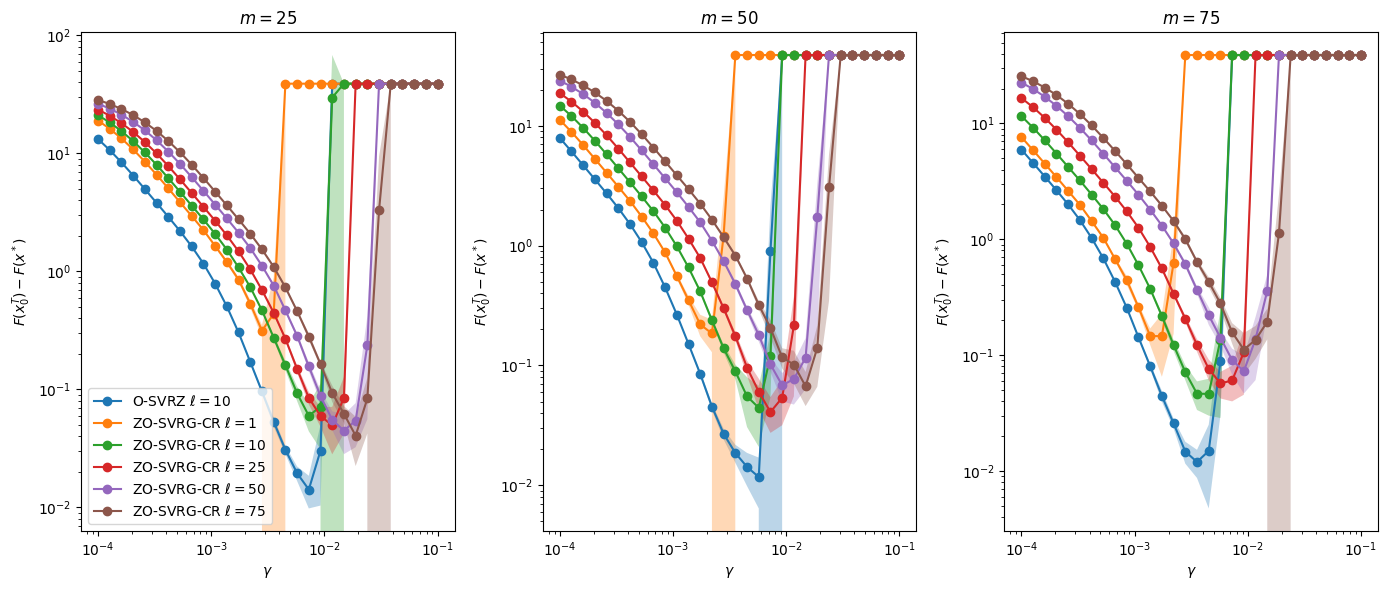

In [33]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(14, 6))
mu  = np.array(osvrz_results_25[0])
std = np.array(osvrz_results_25[1])

ax1.plot(gammas, mu, 'o-', label="O-SVRZ $\\ell = 10$")
ax1.fill_between(gammas, mu - std, mu + std, alpha=0.3)

for (i, result) in enumerate(results_zo_svrg_cr_25):
    values = result['zo_svrg_cr']
    mu  = np.array(values[0])
    std = np.array(values[1])
    ax1.plot(gammas, mu, 'o-', label="ZO-SVRG-CR $\\ell = {}$".format(num_directions_zosvrgcr[i]))
    ax1.fill_between(gammas, mu - std, mu + std, alpha=0.3)


mu  = np.array(osvrz_results_50[0])
std = np.array(osvrz_results_50[1])

ax2.plot(gammas, mu, 'o-', label="O-SVRZ $\\ell = 10$")
ax2.fill_between(gammas, mu - std, mu + std, alpha=0.3)


for (i, result) in enumerate(results_zo_svrg_cr_50):
    values = result['zo_svrg_cr']
    mu  = np.array(values[0])
    std = np.array(values[1])
    ax2.plot(gammas, mu, 'o-', label="ZO-SVRG-CR $\\ell = {}$".format(num_directions_zosvrgcr[i]))
    ax2.fill_between(gammas, mu - std, mu + std, alpha=0.3)



mu  = np.array(osvrz_results_75[0])
std = np.array(osvrz_results_75[1])

ax3.plot(gammas, mu, 'o-', label="O-SVRZ $\\ell = 10$")
ax3.fill_between(gammas, mu - std, mu + std, alpha=0.3)

for (i, result) in enumerate(results_zo_svrg_cr_75):
    values = result['zo_svrg_cr']
    mu  = np.array(values[0])
    std = np.array(values[1])
    ax3.plot(gammas, mu, 'o-', label="ZO-SVRG-CR $\\ell = {}$".format(num_directions_zosvrgcr[i]))
    ax3.fill_between(gammas, mu - std, mu + std, alpha=0.3)




ax1.set_title("$m = 25$")
ax2.set_title("$m = 50$")
ax3.set_title("$m = 75$")

ax1.set_ylabel("$F(x^T_0) - F(x^*)$")
ax1.set_xlabel("$\\gamma$")
ax1.set_yscale("log")
ax1.set_xscale("log")
ax1.legend(loc='lower left')



ax2.set_ylabel("$F(x^T_0) - F(x^*)$")
ax2.set_xlabel("$\\gamma$")
ax2.set_yscale("log")
ax2.set_xscale("log")


ax3.set_ylabel("$F(x^T_0) - F(x^*)$")
ax3.set_xlabel("$\\gamma$")
ax3.set_yscale("log")
ax3.set_xscale("log")



fig.tight_layout()
fig.savefig("./osvrz_vs_zosvrgcr_gamma.png", bbox_inches='tight')

# Comparison with SZRV-G

In [12]:
osvrz_results_25 = read_results(out_dir, 10, 25)['osvrz'] #for l in num_directions]
osvrz_results_50 = read_results(out_dir, 10, 50)['osvrz'] #for l in num_directions]
osvrz_results_75 = read_results(out_dir, 10, 75)['osvrz'] #for l in num_directions]

num_directions_zosvrgcr = [1, 10, 25, 50, 75]#, 25, 50, 75]

results_szrvg_25 = [read_results(out_dir, l, 25) for l in num_directions_zosvrgcr]
results_szrvg_50 = [read_results(out_dir, l, 50) for l in num_directions_zosvrgcr]
results_szrvg_75 = [read_results(out_dir, l, 75) for l in num_directions_zosvrgcr]



In [13]:
len(results_szrvg_75[1]['szrv_g'][0]), len(gammas)

(30, 30)

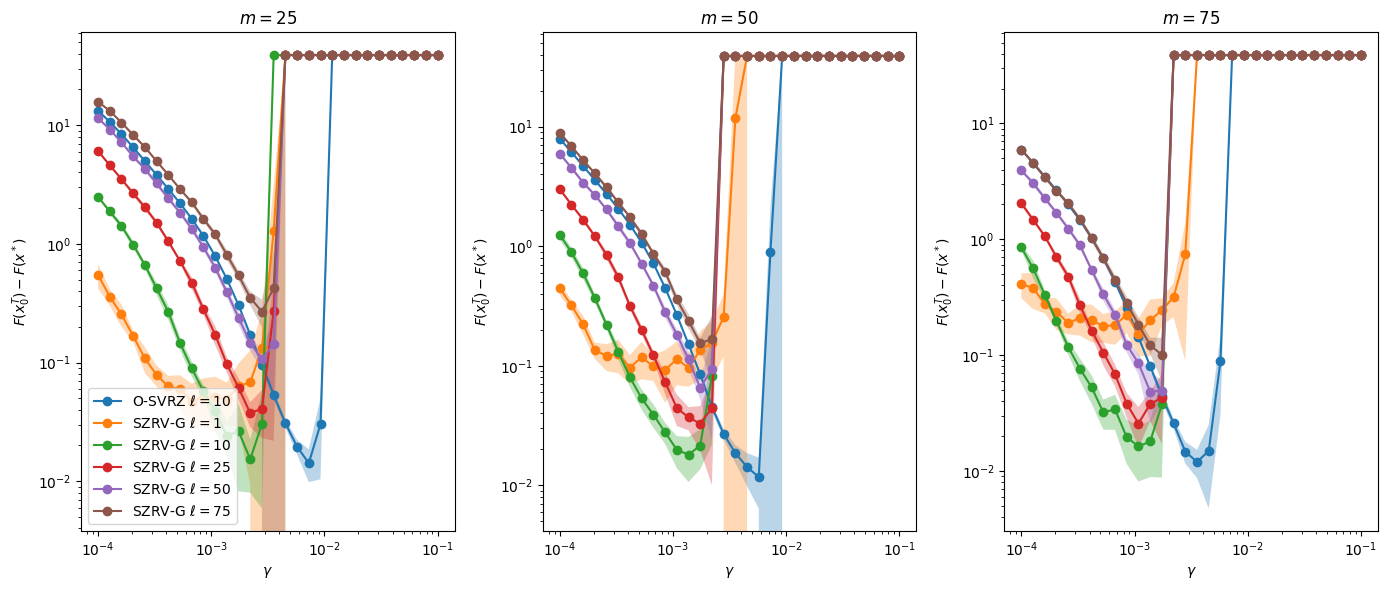

In [14]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(14, 6))
mu  = np.array(osvrz_results_25[0])
std = np.array(osvrz_results_25[1])

ax1.plot(gammas, mu, 'o-', label="O-SVRZ $\\ell = 10$")
ax1.fill_between(gammas, mu - std, mu + std, alpha=0.3)


for (i, result) in enumerate(results_szrvg_25):
    values = result['szrv_g']
    mu  = np.array(values[0])
    std = np.array(values[1])
    ax1.plot(gammas, mu, 'o-', label="SZRV-G $\\ell = {}$".format(num_directions_zosvrgcr[i]))
    ax1.fill_between(gammas, mu - std, mu + std, alpha=0.3)


mu  = np.array(osvrz_results_50[0])
std = np.array(osvrz_results_50[1])

ax2.plot(gammas, mu, 'o-', label="O-SVRZ $\\ell = 10$")
ax2.fill_between(gammas, mu - std, mu + std, alpha=0.3)


for (i, result) in enumerate(results_szrvg_50):
    values = result['szrv_g']
    mu  = np.array(values[0])
    std = np.array(values[1])
    ax2.plot(gammas, mu, 'o-', label="SZRV-G $\\ell = {}$".format(num_directions_zosvrgcr[i]))
    ax2.fill_between(gammas, mu - std, mu + std, alpha=0.3)



mu  = np.array(osvrz_results_75[0])
std = np.array(osvrz_results_75[1])

ax3.plot(gammas, mu, 'o-', label="O-SVRZ $\\ell = 10$")
ax3.fill_between(gammas, mu - std, mu + std, alpha=0.3)

for (i, result) in enumerate(results_szrvg_75):
    values = result['szrv_g']
    mu  = np.array(values[0])
    std = np.array(values[1])
    ax3.plot(gammas, mu, 'o-', label="SZRV-G $\\ell = {}$".format(num_directions_zosvrgcr[i]))
    ax3.fill_between(gammas, mu - std, mu + std, alpha=0.3)




ax1.set_title("$m = 25$")
ax2.set_title("$m = 50$")
ax3.set_title("$m = 75$")

ax1.set_ylabel("$F(x^T_0) - F(x^*)$")
ax1.set_xlabel("$\\gamma$")
ax1.set_yscale("log")
ax1.set_xscale("log")
ax1.legend(loc='lower left')



ax2.set_ylabel("$F(x^T_0) - F(x^*)$")
ax2.set_xlabel("$\\gamma$")
ax2.set_yscale("log")
ax2.set_xscale("log")


ax3.set_ylabel("$F(x^T_0) - F(x^*)$")
ax3.set_xlabel("$\\gamma$")
ax3.set_yscale("log")
ax3.set_xscale("log")



fig.tight_layout()
fig.savefig("./osvrz_vs_szvrg.png", bbox_inches='tight')

# Comparison with ZO-SVRG-Ave

In [16]:
osvrz_results_25 = read_results(out_dir, 10, 25)['osvrz'] #for l in num_directions]
osvrz_results_50 = read_results(out_dir, 10, 50)['osvrz'] #for l in num_directions]
osvrz_results_75 = read_results(out_dir, 10, 75)['osvrz'] #for l in num_directions]

num_directions_zosvrgcr = [1, 10, 25, 50, 75]#, 25, 50, 75]

results_zosvrgave_25 = [read_results(out_dir, l, 25) for l in num_directions_zosvrgcr]
results_zosvrgave_50 = [read_results(out_dir, l, 50) for l in num_directions_zosvrgcr]
results_zosvrgave_75 = [read_results(out_dir, l, 75) for l in num_directions_zosvrgcr]



In [17]:
len(results_zosvrgave_75[0]['zo_svrg_ave'][1]), len(gammas)

(30, 30)

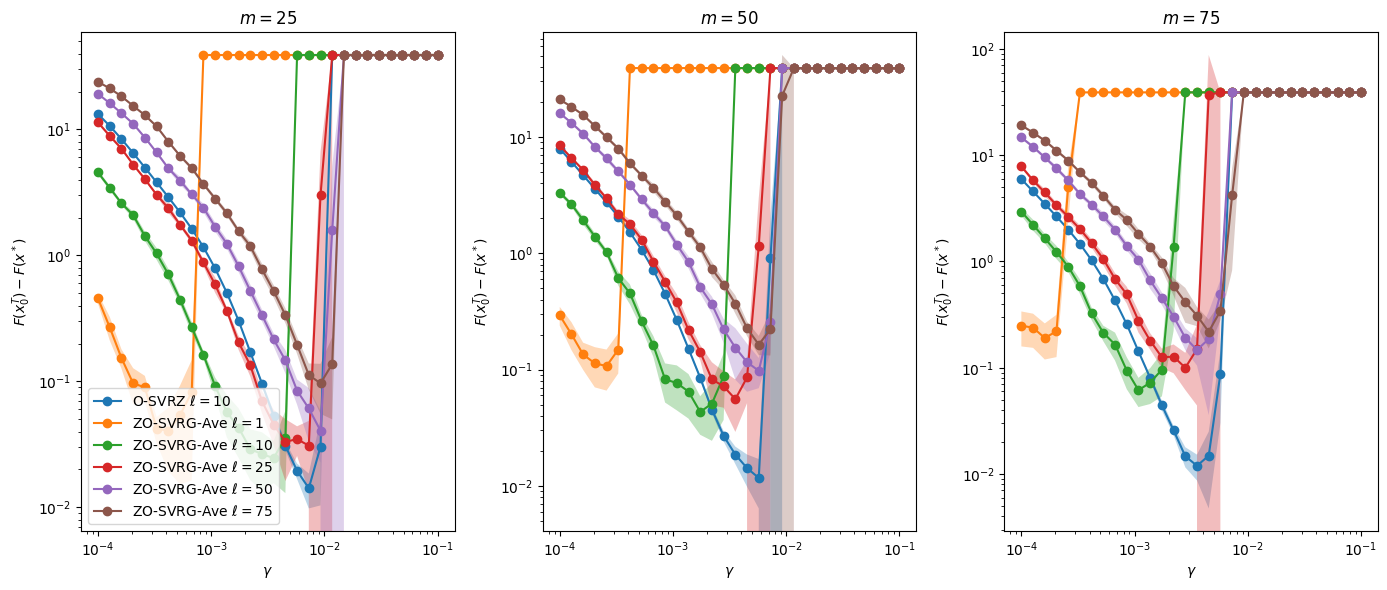

In [18]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(14, 6))
mu  = np.array(osvrz_results_25[0])
std = np.array(osvrz_results_25[1])

ax1.plot(gammas, mu, 'o-', label="O-SVRZ $\\ell = 10$")
ax1.fill_between(gammas, mu - std, mu + std, alpha=0.3)


for (i, result) in enumerate(results_zosvrgave_25):
    values = result['zo_svrg_ave']
    mu  = np.array(values[0])
    std = np.array(values[1])
    ax1.plot(gammas, mu, 'o-', label="ZO-SVRG-Ave $\\ell = {}$".format(num_directions_zosvrgcr[i]))
    ax1.fill_between(gammas, mu - std, mu + std, alpha=0.3)


mu  = np.array(osvrz_results_50[0])
std = np.array(osvrz_results_50[1])

ax2.plot(gammas, mu, 'o-', label="O-SVRZ $\\ell = 10$")
ax2.fill_between(gammas, mu - std, mu + std, alpha=0.3)


for (i, result) in enumerate(results_zosvrgave_50):
    values = result['zo_svrg_ave']
    mu  = np.array(values[0])
    std = np.array(values[1])
    ax2.plot(gammas, mu, 'o-', label="ZO-SVRG-Ave $\\ell = {}$".format(num_directions_zosvrgcr[i]))
    ax2.fill_between(gammas, mu - std, mu + std, alpha=0.3)



mu  = np.array(osvrz_results_75[0])
std = np.array(osvrz_results_75[1])

ax3.plot(gammas, mu, 'o-', label="O-SVRZ $\\ell = 10$")
ax3.fill_between(gammas, mu - std, mu + std, alpha=0.3)

for (i, result) in enumerate(results_zosvrgave_75):
    values = result['zo_svrg_ave']
    mu  = np.array(values[0])
    std = np.array(values[1])
    ax3.plot(gammas, mu, 'o-', label="ZO-SVRG-Ave $\\ell = {}$".format(num_directions_zosvrgcr[i]))
    ax3.fill_between(gammas, mu - std, mu + std, alpha=0.3)




ax1.set_title("$m = 25$")
ax2.set_title("$m = 50$")
ax3.set_title("$m = 75$")

ax1.set_ylabel("$F(x^T_0) - F(x^*)$")
ax1.set_xlabel("$\\gamma$")
ax1.set_yscale("log")
ax1.set_xscale("log")
ax1.legend(loc='lower left')



ax2.set_ylabel("$F(x^T_0) - F(x^*)$")
ax2.set_xlabel("$\\gamma$")
ax2.set_yscale("log")
ax2.set_xscale("log")


ax3.set_ylabel("$F(x^T_0) - F(x^*)$")
ax3.set_xlabel("$\\gamma$")
ax3.set_yscale("log")
ax3.set_xscale("log")



fig.tight_layout()
fig.savefig("./osvrz_vs_zosvrgave_gamma.png", bbox_inches='tight')